In [6]:
import tensorflow as tf

In [28]:
mnist=tf.keras.datasets.mnist #28X28 size images of handwritten numbers

(x_train,y_train),(x_test,y_test)=mnist.load_data()
 
xtrain=tf.keras.utils.normalize(x_train,axis=1)
xtest=tf.keras.utils.normalize(x_test,axis=1)

In [31]:
model=tf.keras.Sequential()


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 26s 437us/sample - loss: 0.2592 - acc: 0.9239
Epoch 2/3
60000/60000 [==============================] - 16s 270us/sample - loss: 0.1066 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0719 - acc: 0.9776


In [32]:
val_loss, val_acc=model.evaluate(xtest,y_test)

10000/10000 [==============================] - 1s 124us/sample - loss: 0.0891 - acc: 0.9736


In [35]:
model.save('Number_Reader.model')

In [36]:
new_model=tf.keras.models.load_model('Number_Reader.model')

In [47]:
predictions=new_model.predict([xtest])
import numpy as np
predictions=np.argmax(predictions[6])
print(predictions)
y_test[6]

4


4

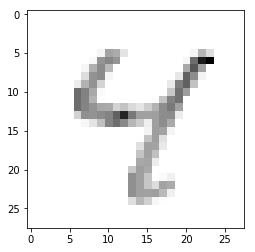

In [43]:
import matplotlib.pyplot as plt

plt.imshow(xtest[6],cmap=plt.cm.binary)